In [1]:
from pprint import pprint
import seaborn as sns
import numpy as np
import sqlalchemy as sql
from matplotlib import pyplot as plt
import pickle
import logging

from utils.data_storage.dataframe2sql import read_pkl_sql
from utils.config.loaders import get_sql_types

sns.set_theme()

In [2]:
logging.getLogger()

<RootLogger root (WARNING)>

In [3]:
ls *.db

benchmarks.db        debug.db                  hp_scans_iflow.db
benchmarks-debug.db  hp_scans_checkerboard.db  sine.db


In [4]:
print(sql.create_engine("sqlite:///sine.db").table_names())
dtypes = get_sql_types()
dtypes["value_history"] = sql.PickleType

['debug-deletable', 'masking_debug']


In [5]:
df = read_pkl_sql("sine.db","debug-deletable", dtypes=dtypes)

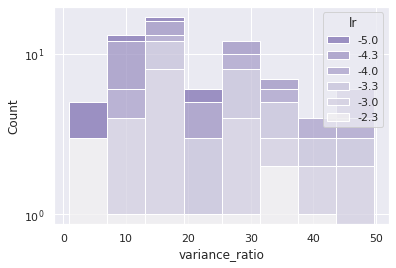

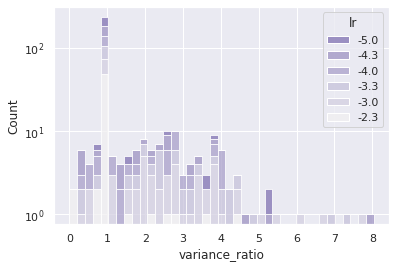

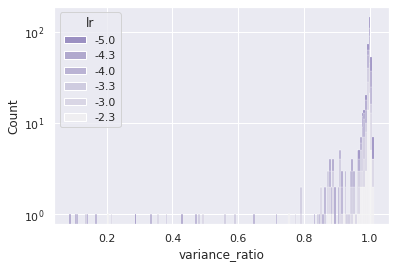

In [6]:
ax = sns.histplot(data=df[df["d"]==2], x="variance_ratio", hue=df["lr"].apply(lambda x: np.round(np.log(x)/np.log(10.),2)), multiple="stack", palette="light:m_r")
ax.set(yscale="log")
plt.show()
ax = sns.histplot(data=df[df["d"]==4], x="variance_ratio", hue=df["lr"].apply(lambda x: np.round(np.log(x)/np.log(10.),2)), multiple="stack", palette="light:m_r")
ax.set(yscale="log")
plt.show()
ax = sns.histplot(data=df[df["d"]==8], x="variance_ratio", hue=df["lr"].apply(lambda x: np.round(np.log(x)/np.log(10.),2)), multiple="stack", palette="light:m_r")
ax.set(yscale="log")
plt.show()

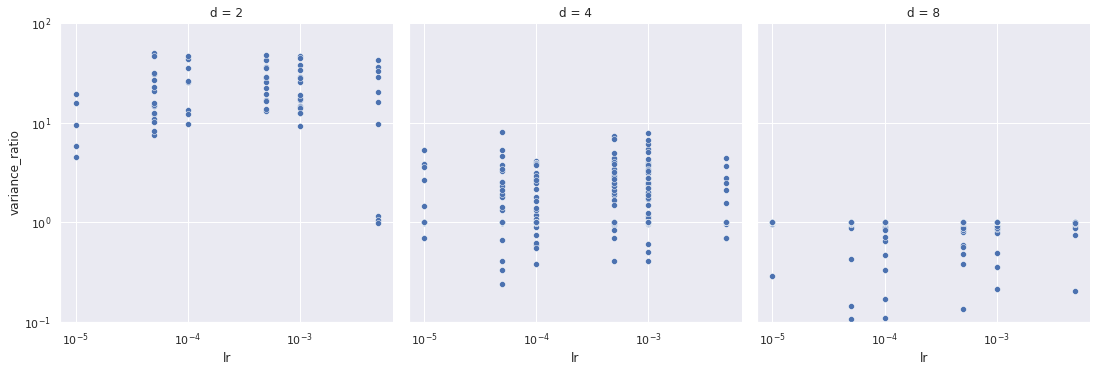

In [7]:
ax = sns.relplot(data=df, x="lr", y="variance_ratio", col=df["d"].astype(str))
ax.set(xscale="log",yscale="log", ylim=[0.1,100])
plt.show()

d = 2


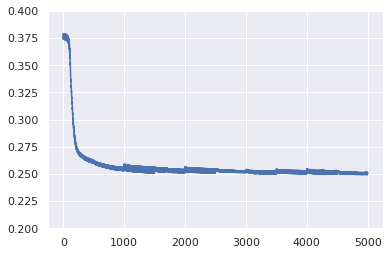

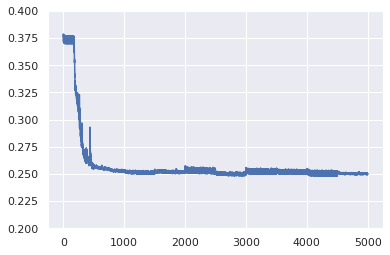

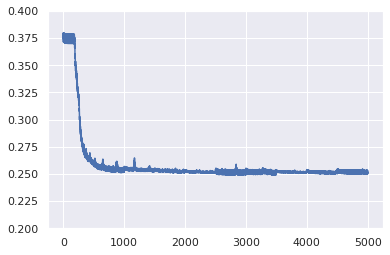

d = 4


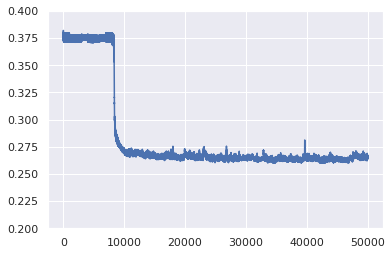

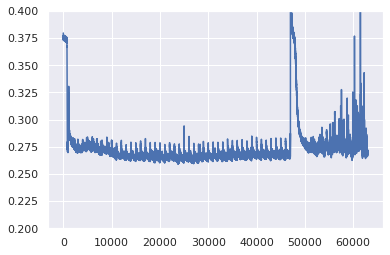

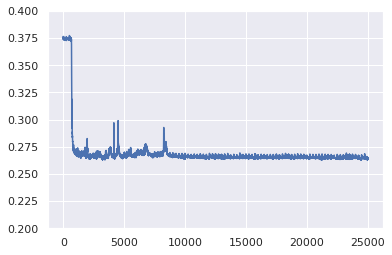

d = 8


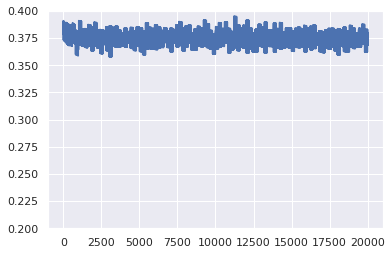

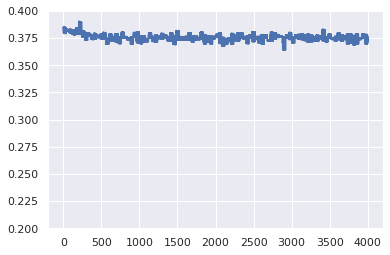

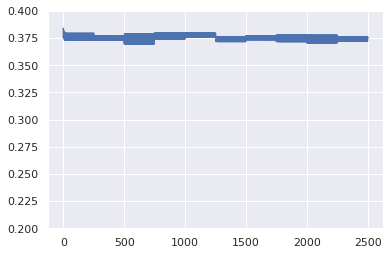

In [8]:
for i in [2,4,8]:
    print("=================")
    print(f"d = {i}")
    print("=================")
    for j in range(3):
        h = df[df["d"] == i].sort_values("variance_ratio",ascending=False).iloc[j]["value_history"]
        fig, ax = plt.subplots()
        ax.plot(h["training record"].apply(lambda x : x["metrics"]["loss"]).sum())
        ax.set(ylim=[0.2,0.4])
        plt.show()

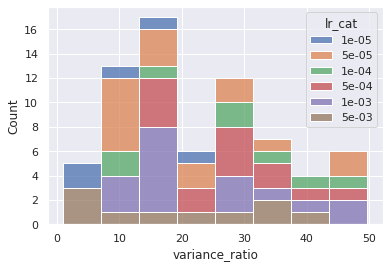

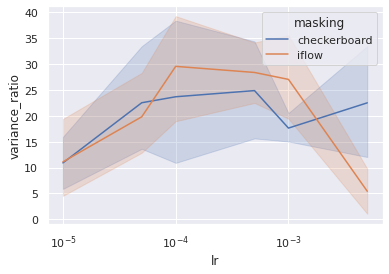

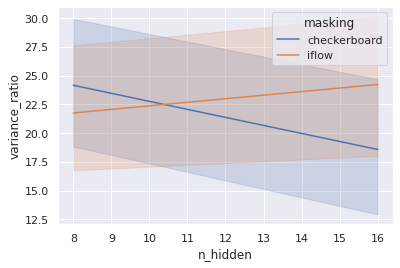

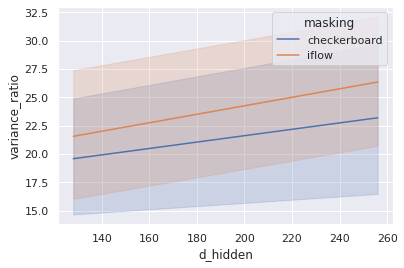

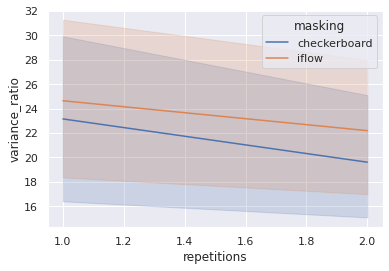

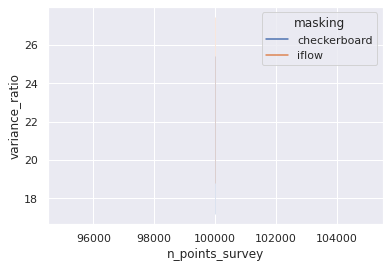

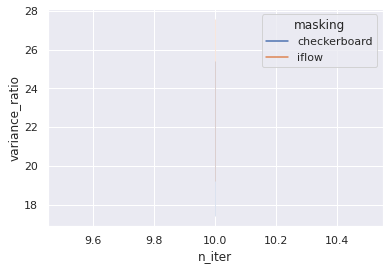

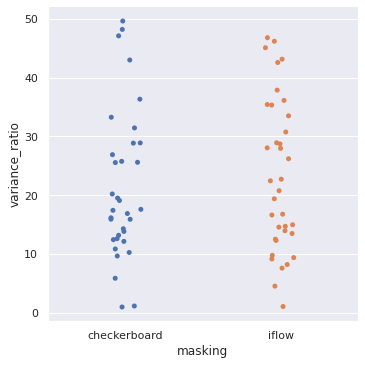

In [9]:
b14 = df[df["d"] == 2].sort_values("variance_ratio",ascending=False).iloc[:100]
b14["lr_cat"] = b14["lr"].apply(lambda lr: f"{lr:.0e}")

lrs = list(df["lr"].unique())
lrs.sort()
lrs = [f"{lr:.0e}" for lr in lrs]

sns.histplot(data=b14, x='variance_ratio', hue='lr_cat', multiple="stack", hue_order=lrs)
plt.show()

ax = sns.lineplot(data=b14, x="lr", y="variance_ratio", hue="masking")
ax.set(xscale="log")
plt.show()
ax = sns.lineplot(data=b14, x="n_hidden", y="variance_ratio", hue="masking")
plt.show()
ax = sns.lineplot(data=b14, x="d_hidden", y="variance_ratio", hue="masking")
plt.show()
ax = sns.lineplot(data=b14, x="repetitions", y="variance_ratio", hue="masking")
plt.show()
ax = sns.lineplot(data=b14, x="n_points_survey", y="variance_ratio", hue="masking")
plt.show()
ax = sns.lineplot(data=b14, x="n_iter", y="variance_ratio", hue="masking")
plt.show()
ax = sns.catplot(data=b14, x="masking", y="variance_ratio")

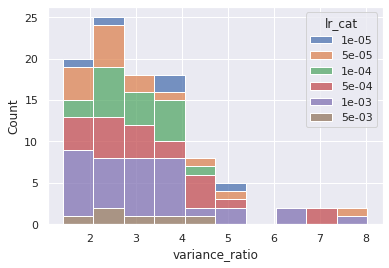

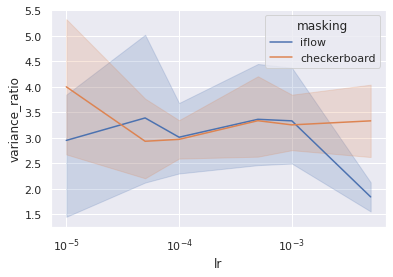

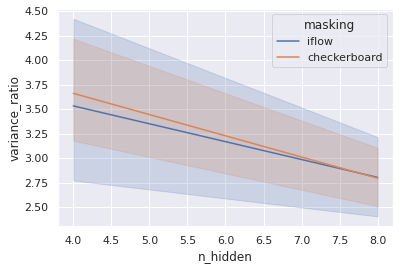

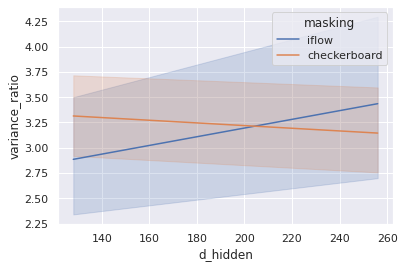

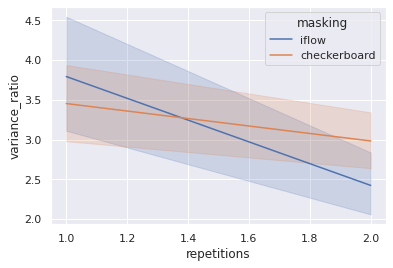

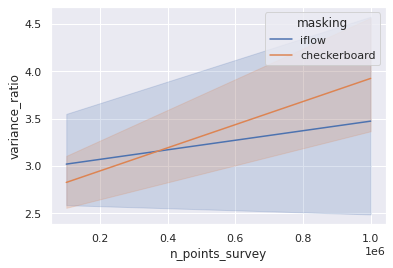

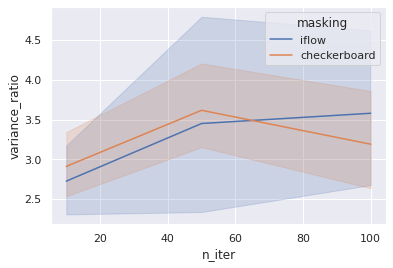

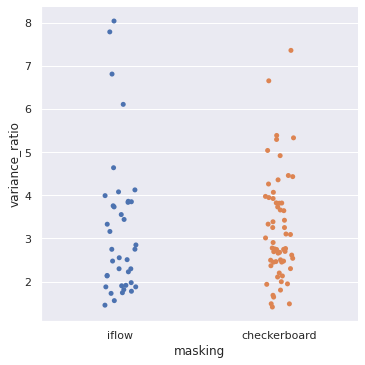

In [10]:
b14 = df[df["d"] == 4].sort_values("variance_ratio",ascending=False).iloc[:100]
b14["lr_cat"] = b14["lr"].apply(lambda lr: f"{lr:.0e}")

lrs = list(df["lr"].unique())
lrs.sort()
lrs = [f"{lr:.0e}" for lr in lrs]

sns.histplot(data=b14, x='variance_ratio', hue='lr_cat', multiple="stack", hue_order=lrs)
plt.show()

ax = sns.lineplot(data=b14, x="lr", y="variance_ratio", hue="masking")
ax.set(xscale="log")
plt.show()
ax = sns.lineplot(data=b14, x="n_hidden", y="variance_ratio", hue="masking")
plt.show()
ax = sns.lineplot(data=b14, x="d_hidden", y="variance_ratio", hue="masking")
plt.show()
ax = sns.lineplot(data=b14, x="repetitions", y="variance_ratio", hue="masking")
plt.show()
ax = sns.lineplot(data=b14, x="n_points_survey", y="variance_ratio", hue="masking")
plt.show()
ax = sns.lineplot(data=b14, x="n_iter", y="variance_ratio", hue="masking")
plt.show()
ax = sns.catplot(data=b14, x="masking", y="variance_ratio")

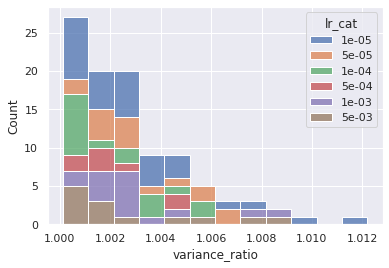

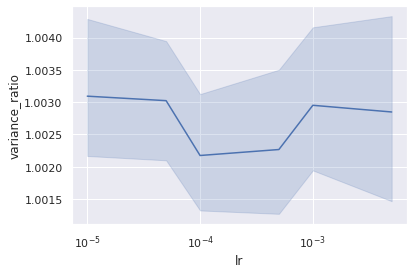

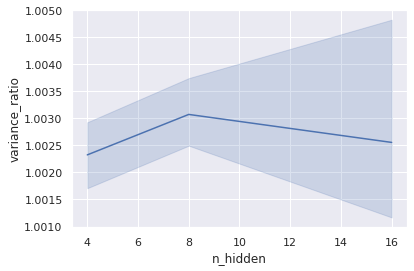

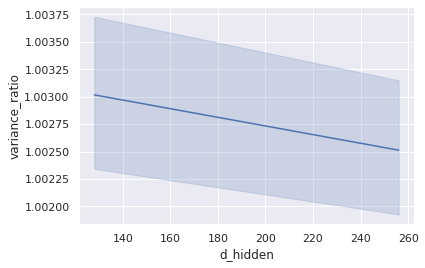

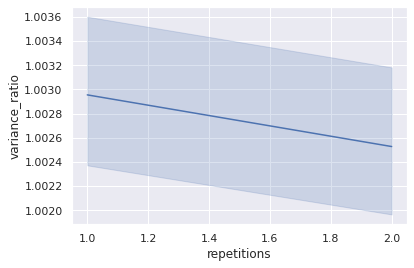

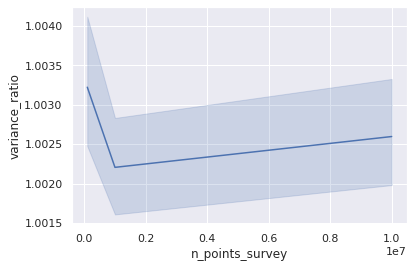

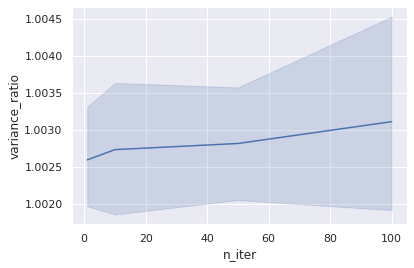

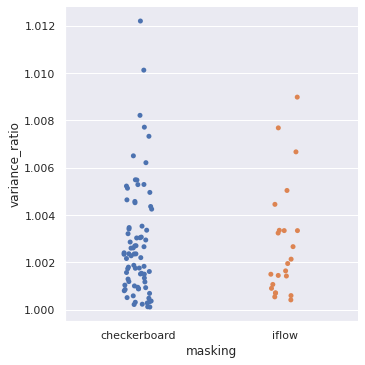

In [11]:
b14 = df[df["d"] == 8].sort_values("variance_ratio",ascending=False).iloc[:100]
b14["lr_cat"] = b14["lr"].apply(lambda lr: f"{lr:.0e}")

lrs = list(df["lr"].unique())
lrs.sort()
lrs = [f"{lr:.0e}" for lr in lrs]

sns.histplot(data=b14, x='variance_ratio', hue='lr_cat', multiple="stack", hue_order=lrs)
plt.show()

ax = sns.lineplot(data=b14, x="lr", y="variance_ratio")
ax.set(xscale="log")
plt.show()
ax = sns.lineplot(data=b14, x="n_hidden", y="variance_ratio")
plt.show()
ax = sns.lineplot(data=b14, x="d_hidden", y="variance_ratio")
plt.show()
ax = sns.lineplot(data=b14, x="repetitions", y="variance_ratio")
plt.show()
ax = sns.lineplot(data=b14, x="n_points_survey", y="variance_ratio")
plt.show()
ax = sns.lineplot(data=b14, x="n_iter", y="variance_ratio")
plt.show()
ax = sns.catplot(data=b14, x="masking", y="variance_ratio")

In [33]:
longrun = df[(df["minibatch_size"] == 10000) & (~df["value"].isna())].sort_values("variance_ratio", ascending=False)

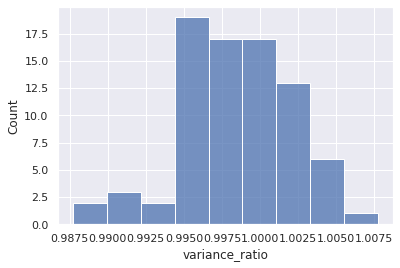

In [34]:
sns.histplot(longrun["variance_ratio"])
plt.show()

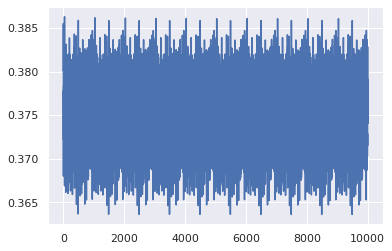

In [48]:
plt.plot(longrun.iloc[2]["value_history"]["training record"][0]["metrics"]["loss"])